In [16]:
import pandas as pd

df = pd.read_pickle('./none-20190407-155058.pkl')
df.columns

Index(['Intake Date', 'Source', 'Species', 'Group', 'Size', 'Outcome',
       'Cause of Death (if applicable)', 'Housing Need'],
      dtype='object')

In [79]:
df

,Intake Date,Source,Species,Group,Size,Outcome,Cause of Death (if applicable),Housing Need
0,2019-03-05,From Field,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
1,2019-03-06,From Field,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
2,2019-03-05,Over Counter,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
3,2019-03-07,Over Counter,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
4,2019-03-05,From Field,Dog,Puppies/Kittens (6 weeks to 6 months),Small (under 35lbs for dogs),Return to Owner,Did Not Die,Co-Housing
5,2019-03-08,From Field,Dog,Adult (6 months to 12 years),Large (over 35lbs for dogs),Return to Owner,Did Not Die,Single Unit Housing
6,2019-03-08,From Field,Dog,Adult (6 months to 12 years),Large (over 35lbs for dogs),Transfer Out,Did Not Die,Single Unit Housing
7,2019-03-09,Over Counter,Dog,Adult (6 months to 12 years),Large (over 35lbs for dogs),Death/Euthanized,Behavior (Including Fractious/Feral),Single Unit Housing
8,2019-03-10,From Field,Dog,Puppies/Kittens (6 weeks to 6 months),Large (over 35lbs for dogs),Adoption,Did Not Die,Single Unit Housing
9,2019-03-11,From Field,Dog,Puppies/Kittens (6 weeks to 6 months),Large (over 35lbs for dogs),Adoption,Did Not Die,Single Unit Housing


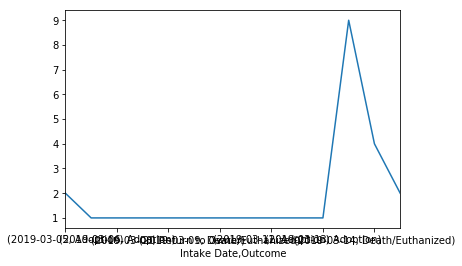

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

df.groupby('Intake Date')['Outcome'].value_counts().plot()

In [81]:
df['Outcome'].value_counts().keys()

Index(['Adoption', 'Death/Euthanized', 'Return to Owner', 'Transfer Out'], dtype='object')

In [82]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [83]:
traces = [go.Histogram(x=df[df['Outcome']==outcome]['Intake Date'], name=outcome.title()) for outcome in list(df['Outcome'].value_counts().keys())]
fig = go.Figure(data=traces, layout=go.Layout(barmode='stack'))
iplot(fig, filename='basic histogram')

In [84]:
vals = df.groupby('Species')['Group'].value_counts().sort_index()
print(vals.keys())
row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
print(row_labels)
print(col_labels)
z = vals
print(z)
print(vals)

MultiIndex(levels=[['Cat', 'Dog'], ['Adult (6 months to 12 years)', 'Neonatal (less than 6 weeks)', 'Puppies/Kittens (6 weeks to 6 months)', 'Senior (12 years and older)']],
           codes=[[0, 0, 0, 0, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2]],
           names=['Species', 'Group'])
['Cat', 'Dog']
['Adult (6 months to 12 years)', 'Neonatal (less than 6 weeks)', 'Puppies/Kittens (6 weeks to 6 months)', 'Senior (12 years and older)']
Species  Group                                
Cat      Adult (6 months to 12 years)              2
         Neonatal (less than 6 weeks)              2
         Puppies/Kittens (6 weeks to 6 months)     2
         Senior (12 years and older)               1
Dog      Adult (6 months to 12 years)             11
         Neonatal (less than 6 weeks)              4
         Puppies/Kittens (6 weeks to 6 months)     5
Name: Group, dtype: int64
Species  Group                                
Cat      Adult (6 months to 12 years)              2
         Neonatal (less th

In [87]:
vals = df.groupby('Species')['Group'].value_counts().sort_index()
row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
z = np.array(df.groupby(['Species','Group']).size().to_frame('count').reset_index().merge(
       pd.DataFrame(list(set([i for i in product(*[df.Group, df.Species])])), columns=['Group', 'Species']),
       on=['Species', 'Group'],
       how='right').fillna(value=0)['count']).reshape(2, 4)
print(z)
print(row_labels)
print(col_labels)

[[ 2.  2.  2.  1.]
 [11.  4.  5.  0.]]
['Cat', 'Dog']
['Adult (6 months to 12 years)', 'Neonatal (less than 6 weeks)', 'Puppies/Kittens (6 weeks to 6 months)', 'Senior (12 years and older)']


In [30]:
from plotly import tools
from itertools import product
import numpy as np
vals = df.groupby('Species')['Group'].value_counts().sort_index()
row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
z = np.array(df.groupby(['Species','Group']).size().to_frame('count').reset_index().merge(
       pd.DataFrame(list(set([i for i in product(*[df.Group, df.Species])])), columns=['Group', 'Species']),
       on=['Species', 'Group'],
       how='right').fillna(value=0)['count']).reshape(2, 4)
heatmap = go.Heatmap(z=z, x=col_labels, y=row_labels, colorscale='Viridis')
hist = go.Histogram(x=df[df['Species'] == 'Dog']['Size'])
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Adult Dog Sizes', 'Population Totals'))
fig.append_trace(hist, 1, 1)
fig.append_trace(heatmap, 1, 2)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [74]:
df['Intake Date'].unique()

array(['2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
       '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12',
       '2019-03-13', '2019-03-14'], dtype=object)

In [79]:
from plotly import tools

#print(vals.keys().levels)

#row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
#z = vals.values.reshape(2, 4)
#heatmap = go.Heatmap(z=z, x=col_labels, y=row_labels, colorscale='Viridis')
print(len(vals))
print(vals.values)
print(np.meshgrid(x, y, z, sparse=True))

16
[[2 2 2 2 2]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [2 2 2 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [6 6 6 6 6]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [2 2 2 2 2]]


In [31]:
np.linspace(0, 1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [76]:
from IPython.core.display import HTML

data = list(zip(["Kittens", "Cats", "Puppies", "Dogs", "Other"], ["1208", "1017", "1335", "2183"]))
print(data)

style = """
<style>
.card {
    word-wrap: break-word;
}
*, ::before, ::after {
    box-sizing: border-box;
}
.card {
    position: relative;
    display: flex;
    flex-direction: column;
    min-width: 0;
    word-wrap: break-word;
    background-color: #fff;
    background-clip: border-box;
    border: 1px solid rgba(0, 0, 0, 0.125);
    border-radius: 0.25rem;
}
.card-header:first-child {
    border-radius: calc(0.25rem - 1px) calc(0.25rem - 1px) 0 0;
}
.card-header {
    padding: 0.75rem 1.25rem;
    margin-bottom: 0;
    color: inherit;
    background-color: rgba(0, 0, 0, 0.03);
    border-bottom: 1px solid rgba(0, 0, 0, 0.125);
}
.card-body {
    flex: 1 1 auto;
    padding: 1.25rem;
}
.lead {
    font-size: 1.125rem;
    font-weight: 300;
}
.table {
    width: 100%;
    margin-bottom: 1rem;
    background-color: transparent;
}
table {
    border-collapse: collapse;
}
th {
    font-weight: 400;
}
.table {
    width: 100%;
    margin-bottom: 1rem;
    background-color: transparent;
}
.table-striped tbody tr:nth-of-type(2n+1) {
    background-color: rgba(0, 0, 0, 0.05);
}
.table th, .table td {
    padding: 0.75rem;
    vertical-align: top;
    border-top: 1px solid #dee2e6;
}  color: #38c172 !important;
}
tr {
    border-bottom: 0px solid #eee;
}
</style>
"""
html = style+html_table(data)
print(html)
HTML(html)
with open('test.htm', 'w') as fp:
    fp.write(html)
#HTML(df.style.set_properties(**{'background-color': 'transparent',
#                           'border-color': 'grey',
#                           'border-spacing': '2px',
#                           'margin-bottom': '1rem',
#                           'border-collapse': 'collapse',
#                           'margin': '0 0 1.5em',
#                           'box-sizing': 'border-box',
#                           'font-size': '1rem',
#                           'color': '#333',
#                           'line-height': '1.5'}).render())

[('Kittens', '1208'), ('Cats', '1017'), ('Puppies', '1335'), ('Dogs', '2183')]

<style>
.card {
    word-wrap: break-word;
}
*, ::before, ::after {
    box-sizing: border-box;
}
.card {
    position: relative;
    display: flex;
    flex-direction: column;
    min-width: 0;
    word-wrap: break-word;
    background-color: #fff;
    background-clip: border-box;
    border: 1px solid rgba(0, 0, 0, 0.125);
    border-radius: 0.25rem;
}
.card-header:first-child {
    border-radius: calc(0.25rem - 1px) calc(0.25rem - 1px) 0 0;
}
.card-header {
    padding: 0.75rem 1.25rem;
    margin-bottom: 0;
    color: inherit;
    background-color: rgba(0, 0, 0, 0.03);
    border-bottom: 1px solid rgba(0, 0, 0, 0.125);
}
.card-body {
    flex: 1 1 auto;
    padding: 1.25rem;
}
.lead {
    font-size: 1.125rem;
    font-weight: 300;
}
.table {
    width: 100%;
    margin-bottom: 1rem;
    background-color: transparent;
}
table {
    border-collapse: collapse;
}
th {
    font-weight: 400;
}
.table {
    wi

In [58]:
data

[['Kittens', 'Cats', 'Puppies', 'Dogs', 'Other'], [1208, 1017, 1335, 2183]]

In [88]:
df

,Intake Date,Source,Species,Group,Size,Outcome,Cause of Death (if applicable),Housing Need
0,2019-03-05,From Field,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
1,2019-03-06,From Field,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
2,2019-03-05,Over Counter,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
3,2019-03-07,Over Counter,Dog,Neonatal (less than 6 weeks),Small (under 35lbs for dogs),Adoption,Did Not Die,Co-Housing
4,2019-03-05,From Field,Dog,Puppies/Kittens (6 weeks to 6 months),Small (under 35lbs for dogs),Return to Owner,Did Not Die,Co-Housing
5,2019-03-08,From Field,Dog,Adult (6 months to 12 years),Large (over 35lbs for dogs),Return to Owner,Did Not Die,Single Unit Housing
6,2019-03-08,From Field,Dog,Adult (6 months to 12 years),Large (over 35lbs for dogs),Transfer Out,Did Not Die,Single Unit Housing
7,2019-03-09,Over Counter,Dog,Adult (6 months to 12 years),Large (over 35lbs for dogs),Death/Euthanized,Behavior (Including Fractious/Feral),Single Unit Housing
8,2019-03-10,From Field,Dog,Puppies/Kittens (6 weeks to 6 months),Large (over 35lbs for dogs),Adoption,Did Not Die,Single Unit Housing
9,2019-03-11,From Field,Dog,Puppies/Kittens (6 weeks to 6 months),Large (over 35lbs for dogs),Adoption,Did Not Die,Single Unit Housing


In [119]:
#vals = df.groupby(['Species', 'Group'])['Outcome'].value_counts().sort_index()
#row_labels, col_labels = [x.tolist() for x in vals.keys().levels]
z = df.groupby(['Species', 'Group', 'Outcome']).size().to_frame('count').reset_index().merge(
       pd.DataFrame(list(set([i for i in product(*[df.Outcome, df.Group, df.Species])])), columns=['Outcome', 'Group', 'Species']),
       on=['Species', 'Group', 'Outcome'],
       how='right').fillna(value=0)
z['GroupLabel'] = z['Species'] + ', ' + z['Group']

In [140]:
grps = z.groupby(['GroupLabel', 'Outcome'])['count']
stacks = {}
labels = []
for grp, val in grps:
    if grp[1] not in labels:
        labels.append(grp[1])
    if grp[0] in stacks:
        stacks[grp[0]].append(float(val))
    else:
        stacks[grp[0]] = [float(val)]
labels

['Adoption', 'Death/Euthanized', 'Return to Owner', 'Transfer Out']

In [160]:
BLUE_SPECUTRUM = ["#8EB5CC", "#84AAC0", "#7A9FB5", "#7094AA", "#67899E", "#5D7E93", "#537388", "#4A687C", "#405D71", "#365266", "#2D485B"]
BLUE_ORANGE_SPECTRUM = ["#8EB5CC", "#96AABD", "#9F9FAE", "#A8959F", "#B18A90", "#BA8081", "#C27572", "#CB6A63", "#D46054", "#DD5545", "#E64B36"]

def get_outcome_color(outcome_label):
    return {'adoption': BLUE_SPECUTRUM[0], 
            'return to owner': BLUE_SPECUTRUM[3], 
            'transfer out': BLUE_SPECUTRUM[6], 
            'lost/stolen': BLUE_SPECUTRUM[9],
            'death/euthanized': '#963022', 
            'owner requested euthanasia': '#842a1e'}[outcome_label.lower()]

traces = []
for idx, label in enumerate(labels):
    traces.append(go.Bar(x=list(stacks.keys()),
                         y=np.transpose(list(stacks.values()))[idx],
                         name=label,
                         marker=dict(color=get_outcome_color(label))))
layout = go.Layout(barmode='stack', title="Outcomes by Group", margin={'b': 150})
fig = go.Figure(data=traces, layout=layout)
iplot(fig, filename='stacked-bar')

In [168]:
def get_font():
    return dict(family='Source Sans Pro, sans-serif')

In [171]:
def population_outcomes_graph(df, expected_height):
    z = df.groupby(['Cause of Death (if applicable)', 'Outcome']).size().to_frame('count').reset_index().merge(
       pd.DataFrame(list(set([i for i in product(*[df['Outcome'], df['Cause of Death (if applicable)']])])), columns=['Outcome', 'Cause of Death (if applicable)']),
       on=['Cause of Death (if applicable)', 'Outcome'],
       how='right').fillna(value=0)
    # z['GroupLabel'] = z['Species'] + ', ' + z['Group']
    grps = z.groupby(['Cause of Death (if applicable)', 'Outcome'])['count']
    stacks = {}
    stacks_norm = {}
    labels = []
    for grp, val in grps:
        if grp[1] not in labels:
            labels.append(grp[1])
        if grp[0] in stacks:
            stacks[grp[0]].append(float(val))
        else:
            stacks[grp[0]] = [float(val)]
    for key in stacks:
        total = np.sum(stacks[key])
        if total == 0:
            stacks_norm[key] = [0 for _ in stacks[key]]
        else:
            stacks_norm[key] = [np.round(float(x)/float(total)*100, decimals=1) for x in stacks[key]]
    traces = []
    traces_norm = []
    for idx, label in enumerate(labels):
        traces.append(go.Bar(x=list(stacks.keys()),
                            y=np.transpose(list(stacks.values()))[idx],
                            name=label,
                            marker=dict(color=get_outcome_color(label))))
        traces_norm.append(go.Bar(x=list(stacks_norm.keys()),
                            y=np.transpose(list(stacks_norm.values()))[idx],
                            name=label,
                            marker=dict(color=get_outcome_color(label)), visible=False))
    def getDataVisibile(norm=False):
        if norm:
            return [False for _ in traces] + [True for _ in traces_norm]
        else:
            return [True for _ in traces] + [False for _ in traces_norm]
    layout = go.Layout(barmode='stack', title="Raw Outcomes by Group", margin={'b': 150}, height=expected_height)
    fig = go.Figure(data=traces+traces_norm, layout=layout)
    fig['layout'].update(font=get_font())
    fig['layout'].update(updatemenus=list([
                                        dict(
                                            buttons=list([   
                                                dict(label = 'Raw Numbers',
                                                    method = 'update',
                                                    args = [{'visible': getDataVisibile(False)},
                                                            {'title': 'Raw Outcomes by Group'}]
                                                ),
                                                dict(label = 'Percentages',
                                                    method = 'update', 
                                                    args = [{'visible': getDataVisibile(True)},
                                                            {'title': 'Percent Outcomes by Group'}]
                                                ),                    
                                            ]),
                                            direction = 'left',
                                            pad = {'r': 10, 't': 10},
                                            showactive = True,
                                            type = 'buttons',
                                            x = 0.1,
                                            xanchor = 'left',
                                            y = 1.1,
                                            yanchor = 'top' 
                                        )
                                    ]))
    return iplot(fig)

population_outcomes_graph(df, 600)

In [13]:
from colour import Color
import numpy as np
Color(hsl=np.array(Color("#AABBCC").hsl) * np.array([1, 0.5, 1])).hex

'#b2bbc3'

In [20]:
import pandas as pd
(max(pd.to_datetime(df['Intake Date'])) - min(pd.to_datetime(df['Intake Date']))).days

9

In [30]:
[x and y for x, y in zip((df['Housing Need'] == 'Single Unit Housing'), (df['Housing Need'] == 'Co-Housing'))]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [28]:
(df['Housing Need'] == 'Co-Housing')

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20     True
21     True
22    False
23    False
24    False
25    False
26    False
Name: Housing Need, dtype: bool